# Proyecto 9 

Descripción del proyecto
Lo has hecho de maravilla en el curso de TripleTen y te han ofrecido hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing. 

Cuentas con:

registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;
un archivo con los pedidos en este periodo;
estadísticas de gastos de marketing.
Lo que vas a investigar: 

cómo los clientes usan el servicio;
cuándo empiezan a comprar;
cuánto dinero aporta cada cliente a la compañía;
cuándo los ingresos cubren el costo de adquisición de los clientes.

**Descripción de los datos**


La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

Uid: identificador único del usuario.
Device: dispositivo del usuario.
Start Ts: fecha y hora de inicio de la sesión.
End Ts: fecha y hora de término de la sesión.
Source Id: identificador de la fuente de anuncios de la que proviene el usuario.
Todas las fechas de esta tabla están en formato AAAA-MM-DD.

La tabla orders (datos sobre pedidos):

Uid: identificador único del usuario que realiza un pedido.
Buy Ts: fecha y hora del pedido. Revenue: el ingreso de Showz por el pedido.
La tabla costs (datos sobre gastos de marketing):

source_id: identificador de la fuente de anuncios.
dt: fecha.
costs: gastos en esta fuente de anuncios en este día.

## Paso 1. Acceda los datos y prepáralos para el análisis

In [1]:
#Importar librerias 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Cargar datos 
costs = pd.read_csv('costs_us.csv')
orders = pd.read_csv('orders_log_us.csv')
visits = pd.read_csv('visits_log_us.csv')


### Enriquecer los datos

In [3]:
# Renombrando columnas para mayor claridad
visits.columns = visits.columns.str.strip().str.lower().str.replace(' ', '_')

In [4]:
# Renombrando columnas para mayor claridad
costs = costs.rename(columns={'dt': 'day_ts'})

In [5]:
# Renombrando columnas para mayor claridad
orders.columns = orders.columns.str.strip().str.lower().str.replace(' ', '_')

In [6]:
#Convertir a formato fecha 
visits['start_ts']=pd.to_datetime(visits['start_ts'])
visits['end_ts']=pd.to_datetime(visits['end_ts'])

In [7]:
# Extraer Día, mes y año
visits['day_ts']=visits['start_ts'].dt.date
visits['month_ts']=visits['start_ts'].dt.to_period('M').dt.start_time
visits['week_ts']=visits['start_ts'].dt.isocalendar().week 

In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
 5   day_ts     359400 non-null  object        
 6   month_ts   359400 non-null  datetime64[ns]
 7   week_ts    359400 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](3), int64(1), object(2), uint64(1)
memory usage: 20.9+ MB


In [9]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   day_ts     2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


## Paso 2. Haz informes y calcula métricas 

### Visitas

#### ¿Cuántas personas lo usan cada día, semana y mes?

In [11]:
#¿Cuántas personas lo usan cada día, semana y mes?
dau = visits.groupby('day_ts').agg({'uid' : 'nunique'})
wau = visits.groupby('week_ts').agg({'uid' : 'nunique'})
mau = visits.groupby('month_ts').agg({'uid' : 'nunique'})



In [12]:
#Promedio por día, semana y mes
print(f"- DAU promedio: {dau['uid'].mean():.2f}")
print(f"- WAU promedio: {wau['uid'].mean():.2f}")
print(f"- MAU promedio: {mau['uid'].mean():.2f}")

- DAU promedio: 907.99
- WAU promedio: 5825.29
- MAU promedio: 23228.42


#### ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [13]:
# Agrupar 
sessions_pd =visits.groupby('day_ts').agg({'uid' : ['count','nunique']})
sessions_pd.columns = ['n_sessions','n_users']
sessions_pd

,n_sessions,n_users
day_ts,,
2017-06-01,664,605
2017-06-02,658,608
2017-06-03,477,445
2017-06-04,510,476
2017-06-05,893,820
...,...,...
2018-05-27,672,620
2018-05-28,1156,1039
2018-05-29,1035,948


In [14]:
sessions_pd.mean()

n_sessions    987.362637
n_users       907.991758
dtype: float64

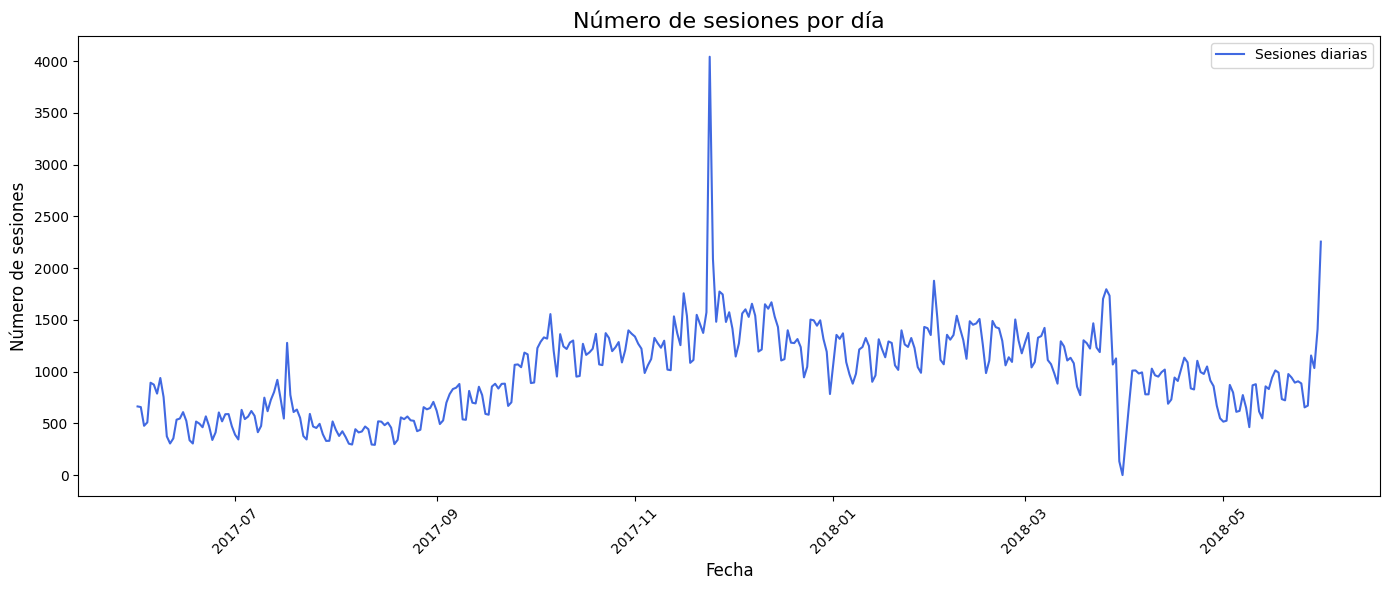

In [15]:
plt.figure(figsize=(14,6))
plt.plot(sessions_pd.index, sessions_pd['n_sessions'], color='royalblue', label='Sesiones diarias')
plt.title('Número de sesiones por día', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de sesiones', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El número de sesiones por día en la plataforma Showz varía a lo largo del tiempo, pero en promedio se registran aproximadamente 987 sesiones diarias entre el 1 de junio de 2017 y el 31 de mayo de 2018. Dado que un mismo usuario puede tener múltiples sesiones en un día, esta métrica refleja el volumen total de actividad diaria en la plataforma.

El análisis muestra una participación constante de los usuarios, con fluctuaciones naturales y picos de actividad en ciertas fechas, posiblemente relacionados con campañas de marketing o lanzamientos de eventos. Esto indica que, aunque existe una base sólida de uso diario, también hay momentos destacados con mayor involucramiento del público.

#### ¿Cuál es la duración de cada sesión en minutos?

In [16]:
# ¿Cuál es la duración de cada sesión en minutos?
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']) .dt.seconds /60

In [17]:
avg_duration = visits['session_duration'].mean()

print(f"Duración promedio de sesión: {avg_duration} minutos")

print(visits['session_duration'].describe())


Duración promedio de sesión: 10.725108143201632 minutos
count    359400.000000
mean         10.725108
std          16.938913
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        1408.000000
Name: session_duration, dtype: float64


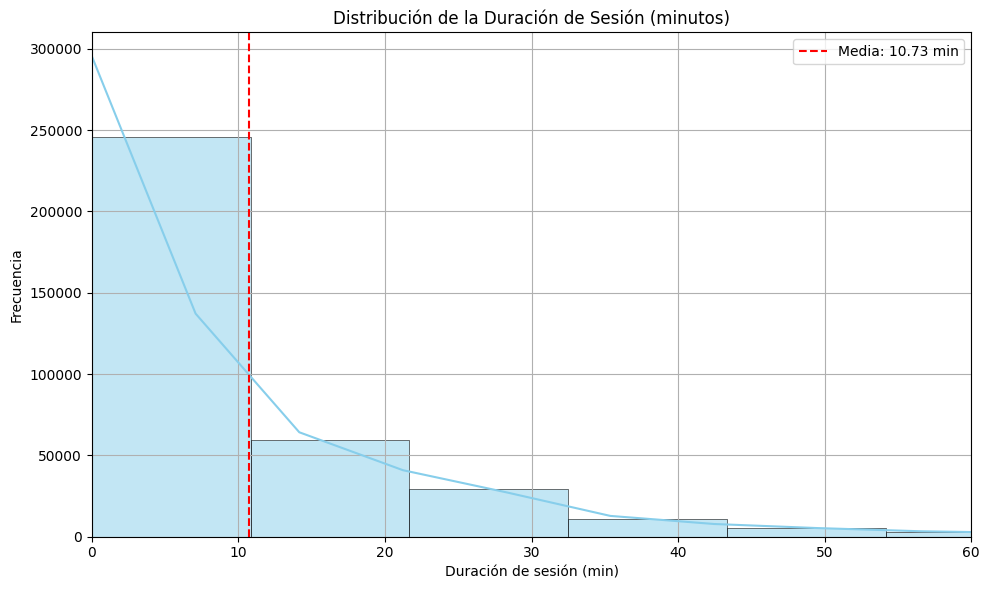

In [18]:
# Graficar histograma con curva KDE
plt.figure(figsize=(10, 6))
sns.histplot(visits['session_duration'], bins=130, kde=True, color='skyblue')

# Línea de la media
plt.axvline(avg_duration, color='red', linestyle='--', label=f"Media: {avg_duration:.2f} min")

# Etiquetas y estilos
plt.title("Distribución de la Duración de Sesión (minutos)")
plt.xlabel("Duración de sesión (min)")
plt.ylabel("Frecuencia")
plt.xlim(0, 60) 
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

La duración de cada sesión en la plataforma Showz varía considerablemente, pero en promedio es de aproximadamente 10.73 minutos. Este valor se calculó tomando la diferencia entre el inicio y el fin de cada sesión, convertido a minutos. El análisis estadístico revela que el 50% de las sesiones dura 5 minutos o menos, el 25% dura 2 minutos o menos, y el 75% no supera los 14 minutos. Existen sesiones significativamente más largas, con una duración máxima registrada de 1408 minutos, lo que sugiere casos atípicos o usuarios altamente comprometidos. Esta información es útil para segmentar usuarios y mejorar la experiencia dentro del sitio, optimizando los tiempos de carga y los puntos clave del recorrido de usuario.

#### ¿Con qué frecuencia los usuarios regresan?

In [19]:
#¿Con qué frecuencia los usuarios regresan?
first_visit = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_visit.columns = ['uid','first_visit_ts']

In [20]:
#Extraer mes y dia 
first_visit['first_visit_day'] = first_visit['first_visit_ts'].dt.date
first_visit['first_visit_month'] = first_visit['first_visit_ts'].dt.to_period('M').dt.start_time

In [21]:
first_visit

,uid,first_visit_ts,first_visit_day,first_visit_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01
...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,2017-11-30,2017-11-01
228165,18446424184725333426,2017-12-06 20:32:00,2017-12-06,2017-12-01
228166,18446556406699109058,2018-01-01 16:29:00,2018-01-01,2018-01-01
228167,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-01


In [22]:
#Fusionar Datos
visits_complete = pd.merge(visits,first_visit)

In [23]:
visits_complete

,device,end_ts,source_id,start_ts,uid,day_ts,month_ts,week_ts,session_duration,first_visit_ts,first_visit_day,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-01,51,18.000000,2017-12-20 17:20:00,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-01,8,28.000000,2018-02-19 16:53:00,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,26,0.000000,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-01,20,24.000000,2018-03-09 20:05:00,2018-03-09,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-01,52,0.000000,2017-12-27 14:06:00,2017-12-27,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017-07-01,30,0.316667,2017-07-29 19:07:00,2017-07-29,2017-07-01
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-01,4,0.316667,2018-01-25 17:38:00,2018-01-25,2018-01-01
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018-03-01,9,0.316667,2018-03-03 10:12:00,2018-03-03,2018-03-01
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-11-01,44,0.316667,2017-11-02 10:12:00,2017-11-02,2017-11-01


In [24]:
# Tasa de retención 
visits_complete['month_cohort'] = visits_complete['month_ts'].dt.month - visits_complete['first_visit_month'].dt.month
visits_complete['month_cohort'] += 12 * (visits_complete['month_ts'].dt.year - visits_complete['first_visit_month'].dt.year)

In [25]:
# Analisis de cohorts
cohort = visits_complete.pivot_table(index='first_visit_month',
                                     columns='month_cohort',
                                     values='uid',
                                     aggfunc='nunique'
                                     )

cohort.fillna('')

month_cohort,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02-01,22197.0,1267.0,565.0,446.0,,,,,,,,


In [26]:
cohort = cohort.fillna(0)

# Calcular tasa de retención en %
retention = cohort.divide(cohort[0], axis=0) * 100

# Redondear para mejor visualización
retention = retention.round(2)

retention

month_cohort,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,100.0,7.87,5.38,6.14,6.86,7.14,6.10,5.78,5.23,5.08,4.07,4.5
2017-07-01,100.0,5.61,5.13,5.62,5.82,4.82,4.54,4.57,3.88,2.86,2.75,0.0
2017-08-01,100.0,7.69,6.29,6.28,5.01,4.40,3.63,3.95,2.79,2.60,0.00,0.0
2017-09-01,100.0,8.55,6.92,5.07,3.94,3.78,3.59,2.42,2.28,0.00,0.00,0.0
2017-10-01,100.0,7.86,5.22,3.90,3.43,3.22,2.14,2.04,0.00,0.00,0.00,0.0
2017-11-01,100.0,7.83,4.41,3.87,3.37,2.34,2.18,0.00,0.00,0.00,0.00,0.0
2017-12-01,100.0,5.58,3.80,3.11,2.03,1.90,0.00,0.00,0.00,0.00,0.00,0.0
2018-01-01,100.0,5.97,3.93,2.50,2.02,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2018-02-01,100.0,5.71,2.55,2.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


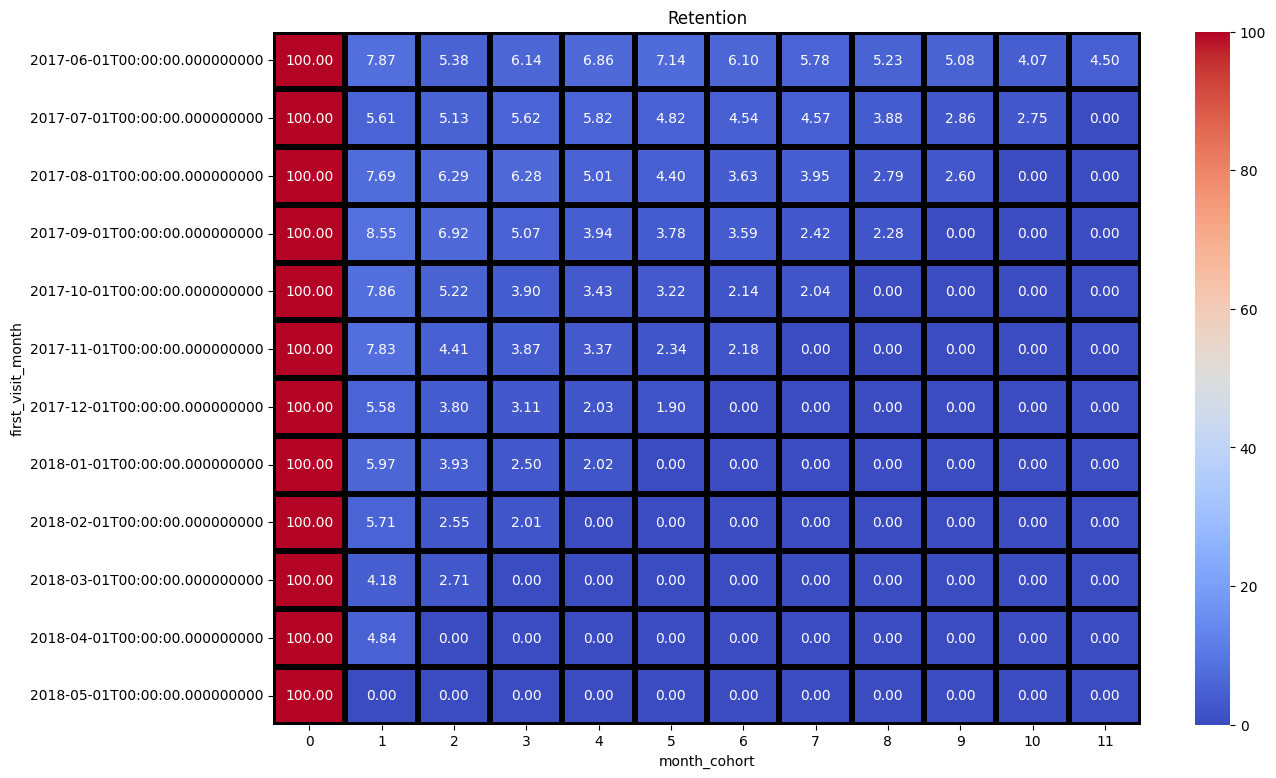

In [27]:
retention_rounded = retention.round(2)

plt.figure(figsize=(14, 9))
plt.title('Retention')

sns.heatmap(
    retention_rounded, 
    annot=True,        
    fmt='.2f',        
    linewidths=3,     
    linecolor='black',
    cmap='coolwarm'   
)

plt.show()

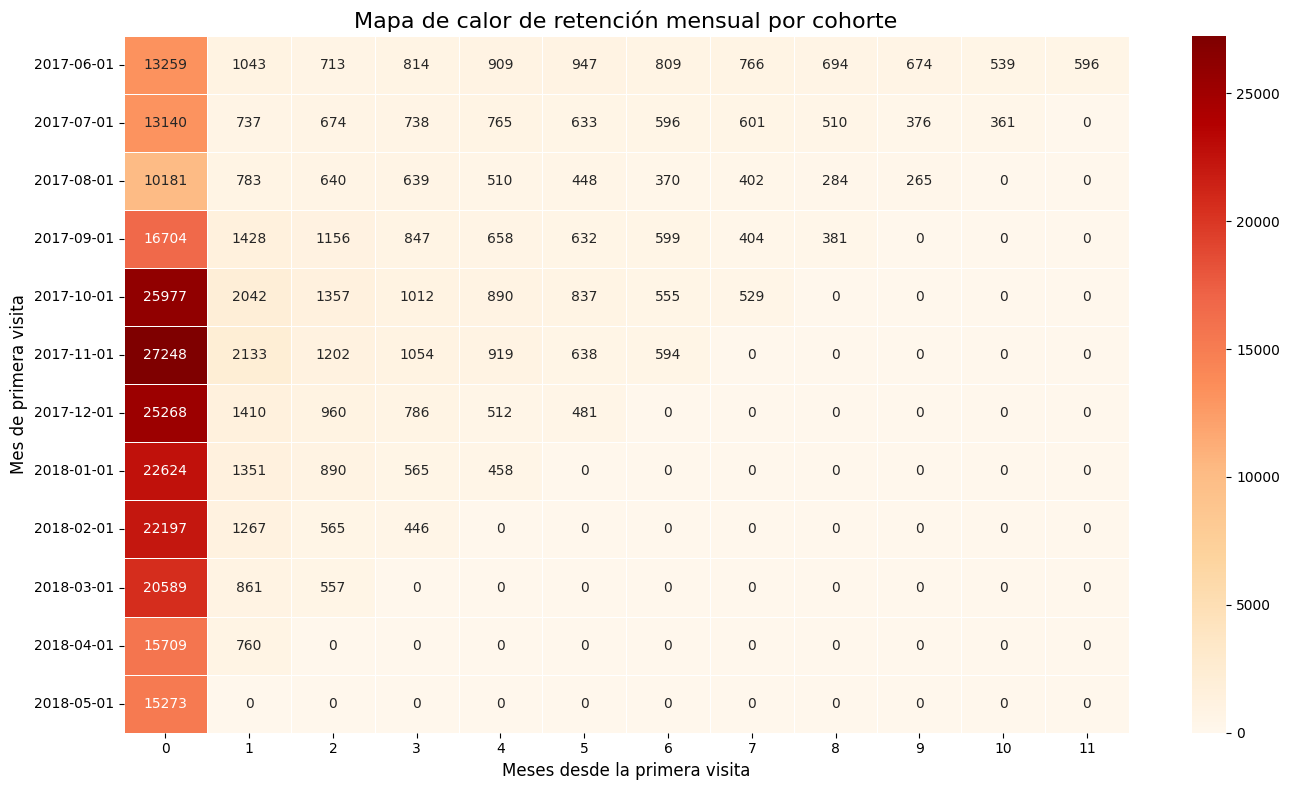

In [28]:

cohort.index = cohort.index.to_series().dt.date  

plt.figure(figsize=(14, 8))
sns.heatmap(cohort, annot=True, fmt='.0f', cmap='OrRd', linewidths=.5, linecolor='white')
plt.title('Mapa de calor de retención mensual por cohorte', fontsize=16)
plt.xlabel('Meses desde la primera visita', fontsize=12)
plt.ylabel('Mes de primera visita', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Para comprender mejor la frecuencia de retorno, se construyó un análisis de cohortes mensuales. Cada cohorte representa a los usuarios según su mes de primera visita, y se rastreó cuántos de ellos regresaron en los meses siguientes.
la frecuencia de retorno de los usuarios es mayor en el mes inmediatamente siguiente a su primera visita, con tasas de retención que oscilan entre el 4% y el 8%, y luego disminuye progresivamente con el tiempo; en los meses 2 y 3, alrededor del 2.5% al 6% de los usuarios regresan, estabilizándose después en porcentajes más bajos (1% a 4%) hasta casi un año.

### Ventas

#### ¿Cuándo empieza la gente a comprar? 

In [29]:
orders

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [30]:
# Convertir a datetime
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['day_ts'] = pd.to_datetime(costs['day_ts']) 

In [31]:
# Obtener la primera fecha de compra por usuario
first_purchase = orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchase.columns = ['uid', 'first_purchase_ts']

In [32]:
#Extraer mes y dia 
first_purchase['first_purchase_day'] = first_purchase['first_purchase_ts'].dt.date
first_purchase['first_purchase_month'] = first_purchase['first_purchase_ts'].dt.to_period('M')

In [33]:
first_purchase

,uid,first_purchase_ts,first_purchase_day,first_purchase_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11
...,...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-11-24,2017-11
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22,2017-09
36520,18445601152732270159,2018-03-26 22:54:00,2018-03-26,2018-03
36521,18446156210226471712,2018-02-18 19:34:00,2018-02-18,2018-02


In [34]:
# Unir primeras visitas y primera compara
conversion = pd.merge(first_visit, first_purchase, on='uid', how='inner')

In [35]:
conversion.head(10)

,uid,first_visit_ts,first_visit_day,first_visit_month,first_purchase_ts,first_purchase_day,first_purchase_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11
5,3077748354309989,2018-03-03 12:08:00,2018-03-03,2018-03-01,2018-03-03 12:33:00,2018-03-03,2018-03
6,3605148382144603,2017-08-15 21:54:00,2017-08-15,2017-08-01,2017-09-21 20:56:00,2017-09-21,2017-09
7,3753586865891862,2018-03-03 13:47:00,2018-03-03,2018-03-01,2018-03-03 13:50:00,2018-03-03,2018-03
8,4808417689019433,2018-01-09 23:10:00,2018-01-09,2018-01-01,2018-01-09 23:32:00,2018-01-09,2018-01
9,4992223027560440,2018-04-04 13:54:00,2018-04-04,2018-04-01,2018-04-04 13:54:00,2018-04-04,2018-04


In [36]:
#Convertir a fecha 
conversion['first_purchase_day']=pd.to_datetime(conversion['first_purchase_day'])
conversion['first_visit_day']=pd.to_datetime(conversion['first_visit_day'])

In [37]:
# Calcular días hasta la conversión
conversion['conversion_days'] = (conversion['first_purchase_ts'] - conversion['first_visit_ts']).dt.days
conversion

,uid,first_visit_ts,first_visit_day,first_visit_month,first_purchase_ts,first_purchase_day,first_purchase_month,conversion_days
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11,0
...,...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-20,2017-08-01,2017-11-24 09:03:00,2017-11-24,2017-11,95
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09,0
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2017-08-01,2018-03-26 22:54:00,2018-03-26,2018-03,231
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18 19:34:00,2018-02-18,2018-02,103


La mayoría de los usuarios que realizan una compra lo hacen el mismo día de su primera visita: aproximadamente el 87% convierte en el día 0. Esto indica que la decisión de compra ocurre de forma muy rápida para la mayoría de los clientes. A partir del segundo día, la conversión disminuye considerablemente: solo un 3,3% convierte al día siguiente, y los porcentajes continúan bajando con cada día adicional. Este patrón sugiere que el momento más crítico para influir en el usuario y lograr que compre es durante su primera sesión o dentro de las primeras 24 horas. Aprovechar este periodo con promociones, mensajes claros o recordatorios puede ser clave para mejorar la tasa de conversión.

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [38]:
first_order=orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_order.columns = ['uid', 'first_order_ts']
first_order


,uid,first_order_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [39]:
#Extraer mes y dia 
first_order['first_order_day'] = first_order['first_order_ts'].dt.date
first_order['first_order_month'] = first_order['first_order_ts'].dt.to_period('M')
first_order

,uid,first_order_ts,first_order_day,first_order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11
...,...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-11-24,2017-11
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22,2017-09
36520,18445601152732270159,2018-03-26 22:54:00,2018-03-26,2018-03
36521,18446156210226471712,2018-02-18 19:34:00,2018-02-18,2018-02


In [40]:
orders_per_user = conversion.groupby('first_purchase_month').agg({'uid':'nunique'}).reset_index().rename(columns={'uid': 'orders_per_month'})

In [41]:
orders_per_user

,first_purchase_month,orders_per_month
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


In [42]:
orders['order_month'] = orders['buy_ts'].dt.to_period('M')
orders['buy_dt'] = orders['buy_ts'].dt.date

In [43]:
orders

,buy_ts,revenue,uid,order_month,buy_dt
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05,2018-05-31


In [44]:
complete = pd.merge(orders,conversion,on='uid')
complete

,buy_ts,revenue,uid,order_month,buy_dt,first_visit_ts,first_visit_day,first_visit_month,first_purchase_ts,first_purchase_day,first_purchase_month,conversion_days
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06-01,2017-06-01 00:09:00,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06-01,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06-01,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06-01,2017-06-01 07:31:00,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05,2018-05-31,2018-05-31 09:11:00,2018-05-31,2018-05-01,2018-05-31 23:50:00,2018-05-31,2018-05,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05,2018-05-31,2018-05-31 23:05:00,2018-05-31,2018-05-01,2018-05-31 23:50:00,2018-05-31,2018-05,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05,2018-05-31,2018-05-31 23:52:00,2018-05-31,2018-05-01,2018-05-31 23:54:00,2018-05-31,2018-05,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05,2018-05-31,2017-10-23 12:32:00,2017-10-23,2017-10-01,2018-05-31 23:56:00,2018-05-31,2018-05,220


In [45]:
cohort_1 = complete.groupby(['first_purchase_month','order_month']).agg({'revenue':'count'}).reset_index()
cohort_1

,first_purchase_month,order_month,revenue
0,2017-06,2017-06,2354
1,2017-06,2017-07,177
2,2017-06,2017-08,174
3,2017-06,2017-09,226
4,2017-06,2017-10,292
...,...,...,...
74,2018-03,2018-05,176
75,2018-04,2018-04,2495
76,2018-04,2018-05,195
77,2018-05,2018-05,3249


In [46]:
cohort_1['age']= (cohort_1['order_month'] - cohort_1['first_purchase_month']).apply(lambda x:x.n)
cohort_1.rename(columns={'revenue':'n_orders'},inplace=True)

In [47]:
report = pd.merge(cohort_1,orders_per_user,on='first_purchase_month') 
report.rename(columns={'orders_per_month':'n_buyers'},inplace=True)
report

,first_purchase_month,order_month,n_orders,age,n_buyers
0,2017-06,2017-06,2354,0,2023
1,2017-06,2017-07,177,1,2023
2,2017-06,2017-08,174,2,2023
3,2017-06,2017-09,226,3,2023
4,2017-06,2017-10,292,4,2023
...,...,...,...,...,...
74,2018-03,2018-05,176,2,3533
75,2018-04,2018-04,2495,0,2276
76,2018-04,2018-05,195,1,2276
77,2018-05,2018-05,3249,0,2988


In [48]:
report['orders_per_user_'] = report['n_orders']/report['n_buyers']
report

,first_purchase_month,order_month,n_orders,age,n_buyers,orders_per_user_
0,2017-06,2017-06,2354,0,2023,1.163618
1,2017-06,2017-07,177,1,2023,0.087494
2,2017-06,2017-08,174,2,2023,0.086011
3,2017-06,2017-09,226,3,2023,0.111715
4,2017-06,2017-10,292,4,2023,0.144340
...,...,...,...,...,...,...
74,2018-03,2018-05,176,2,3533,0.049816
75,2018-04,2018-04,2495,0,2276,1.096221
76,2018-04,2018-05,195,1,2276,0.085677
77,2018-05,2018-05,3249,0,2988,1.087349


In [49]:
report.pivot_table(index='first_purchase_month',
            columns='age',
            values='orders_per_user_',
            aggfunc='sum')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06,1.163618,0.087494,0.086011,0.111715,0.144340,0.107761,0.136431,0.086011,0.104795,0.075630,0.047454,0.042511
2017-07,1.136765,0.052002,0.062402,0.054082,0.037441,0.042642,0.031721,0.026001,0.030161,0.012480,0.027561,NaN
2017-08,1.118978,0.078832,0.072993,0.059124,0.062044,0.045255,0.035766,0.056934,0.033577,0.033577,NaN,NaN
2017-09,1.136381,0.084851,0.062379,0.063541,0.025959,0.042232,0.041844,0.021697,0.023634,NaN,NaN,NaN
2017-10,1.143779,0.072350,0.037327,0.028111,0.029724,0.023733,0.019816,0.028802,NaN,NaN,NaN,NaN
2017-11,1.179368,0.097280,0.044597,0.051703,0.033325,0.014457,0.024994,NaN,NaN,NaN,NaN,NaN
2017-12,1.152635,0.061602,0.046087,0.040840,0.019621,0.023956,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.121554,0.066410,0.047139,0.018974,0.023125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.121611,0.060805,0.022733,0.019173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Durante el período comprendido entre junio de 2017 y junio de 2018, el número promedio de pedidos mensuales fue de aproximadamente 2,802, lo que indica una actividad de compra sostenida en la plataforma. La tendencia general refleja un comportamiento de compra relativamente estable. Es importante destacar que, en promedio, la mayoría de los usuarios realizó un solo pedido en este período, lo que sugiere un patrón de compra ocasional más que recurrente.

#### ¿Cuál es el tamaño promedio de compra?

In [50]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

El tamaño promedio de compra en este conjunto de datos es cercano a 4.9 unidades monetarias. Sin embargo, este valor está influenciado por la presencia de compras poco frecuentes pero muy elevadas, conocidas como valores extremos. Esto hace que el promedio no represente fielmente el comportamiento habitual de los clientes. De hecho, la mediana (2.5) y los percentiles indican que la mayoría de los pedidos son significativamente más bajos, con el 75% de las compras por debajo de 4.89 unidades monetarias. Por ello, aunque el promedio es útil, no refleja con precisión el tamaño típico de las compras.

In [51]:
# Calcular percentiles relevantes
p25 = orders['revenue'].quantile(0.25)
p50 = orders['revenue'].quantile(0.50)  # Mediana
p75 = orders['revenue'].quantile(0.75)

print(f"Percentil 25 (Q1): {p25:.2f}")
print(f"Mediana (Q2): {p50:.2f}")
print(f"Percentil 75 (Q3): {p75:.2f}")

Percentil 25 (Q1): 1.22
Mediana (Q2): 2.50
Percentil 75 (Q3): 4.89


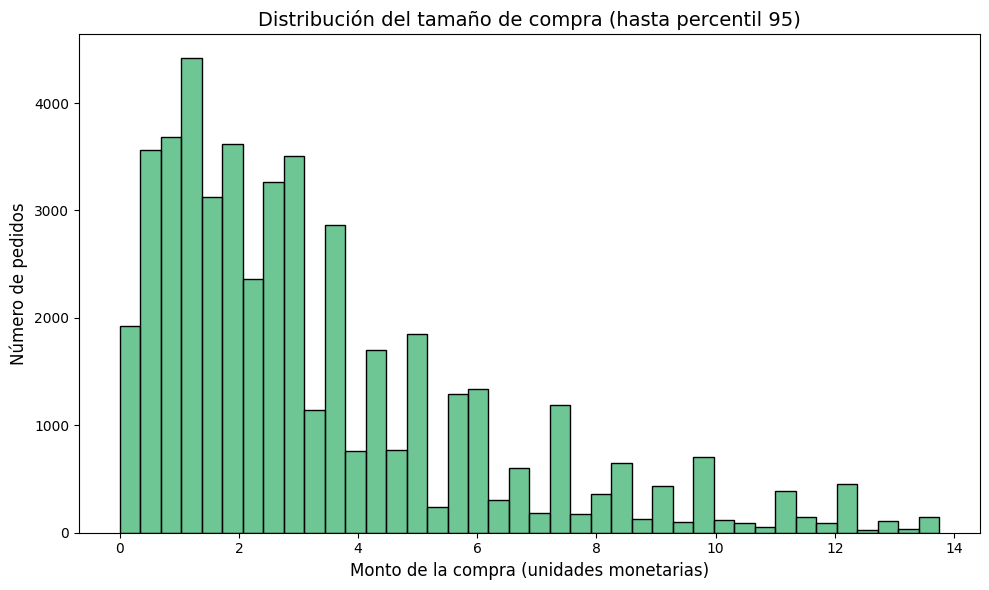

In [52]:
# Filtrar los datos hasta el percentil 95 para visualización
revenue_95 = orders[orders['revenue'] <= orders['revenue'].quantile(0.95)]

# Histograma más representativo
plt.figure(figsize=(10,6))
sns.histplot(revenue_95['revenue'], bins=40, color='mediumseagreen')
plt.title('Distribución del tamaño de compra (hasta percentil 95)', fontsize=14)
plt.xlabel('Monto de la compra (unidades monetarias)', fontsize=12)
plt.ylabel('Número de pedidos', fontsize=12)
plt.tight_layout()
plt.show()

En esta segunda gráfica se han excluido las compras más extremas (las que superan el percentil 95), permitiendo una vista más clara de cómo se distribuyen la mayoría de los pedidos. Al eliminar esos valores atípicos, la forma real de la distribución se vuelve más visible y fácil de interpretar. Esta visualización muestra que la gran mayoría de las compras se concentran en montos pequeños, lo cual se alinea con lo que indican la mediana y los percentiles. Presentamos esta gráfica para ofrecer una interpretación más realista y útil del comportamiento típico de compra entre los clientes.

#### ¿Cuánto dinero traen? (LTV)

In [53]:
orders = orders.merge(first_purchase[['uid', 'first_purchase_month']], on='uid', how='left')

In [54]:
orders['age'] = ((orders['order_month'].dt.year - orders['first_purchase_month'].dt.year) * 12 + 
                 (orders['order_month'].dt.month - orders['first_purchase_month'].dt.month))

In [55]:
cohort_revenue = orders.groupby(['first_purchase_month', 'age'])['revenue'].sum().reset_index()

In [56]:
cohort_revenue = cohort_revenue.sort_values(['first_purchase_month', 'age'])

In [57]:
cohort_revenue['ltv_cumulative'] = cohort_revenue.groupby('first_purchase_month')['revenue'].cumsum()

In [58]:
cohort_sizes = first_purchase.groupby('first_purchase_month')['uid'].nunique().reset_index()
cohort_sizes.rename(columns={'uid': 'n_users'}, inplace=True)

In [59]:
cohort_revenue = cohort_revenue.merge(cohort_sizes, on='first_purchase_month')
cohort_revenue['ltv_per_user'] = cohort_revenue['ltv_cumulative'] / cohort_revenue['n_users']
cohort_revenue

,first_purchase_month,age,revenue,ltv_cumulative,n_users,ltv_per_user
0,2017-06,0,9557.49,9557.49,2023,4.724414
1,2017-06,1,981.82,10539.31,2023,5.209743
2,2017-06,2,885.34,11424.65,2023,5.647380
3,2017-06,3,1931.30,13355.95,2023,6.602051
4,2017-06,4,2068.58,15424.53,2023,7.624582
...,...,...,...,...,...,...
74,2018-03,2,1114.87,19273.41,3533,5.455253
75,2018-04,0,10600.69,10600.69,2276,4.657597
76,2018-04,1,1209.92,11810.61,2276,5.189196
77,2018-05,0,13925.76,13925.76,2988,4.660562


In [60]:
ltv_pivot = cohort_revenue.pivot(
    index='first_purchase_month',  
    columns='age',                 
    values='ltv_per_user'
)
ltv_pivot

age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


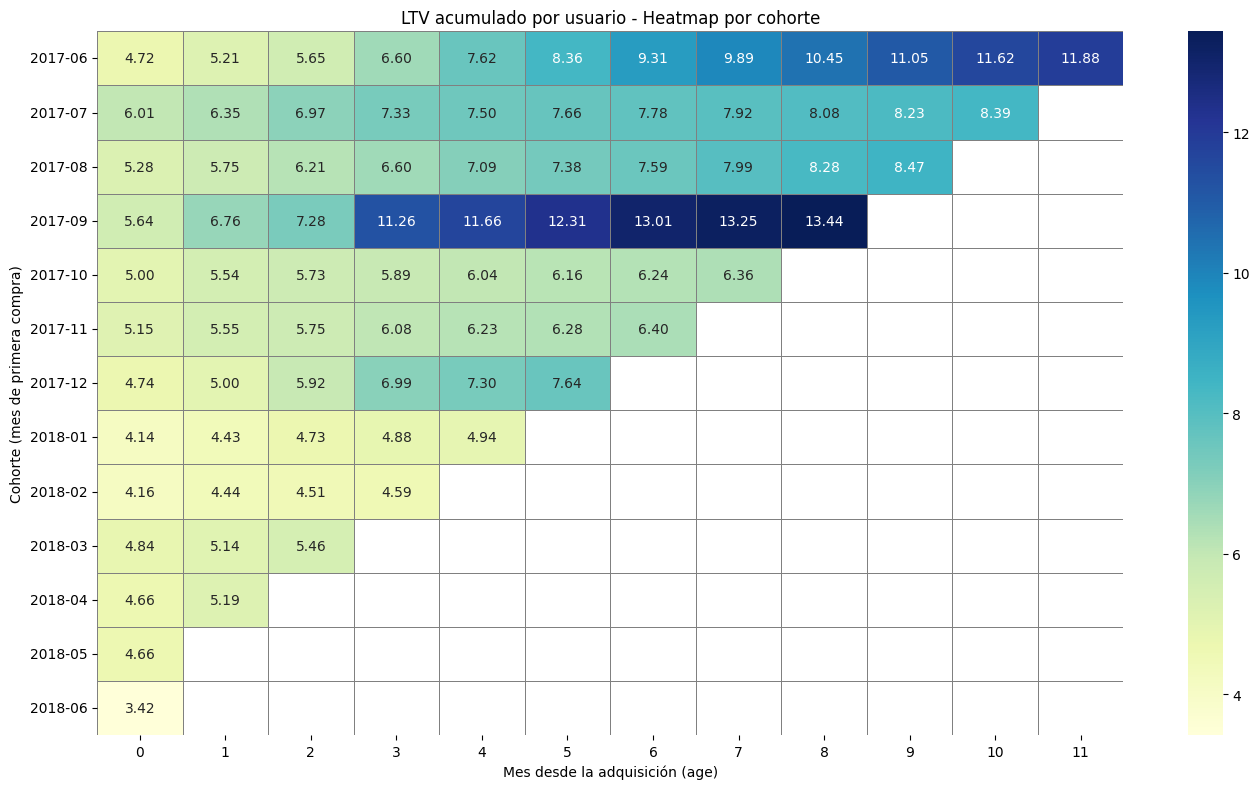

In [61]:
ltv_pivot = ltv_pivot.sort_index()

plt.figure(figsize=(14, 8))
sns.heatmap(ltv_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("LTV acumulado por usuario - Heatmap por cohorte")
plt.xlabel("Mes desde la adquisición (age)")
plt.ylabel("Cohorte (mes de primera compra)")
plt.tight_layout()
plt.show()

El LTV por usuario empieza en 4.72 unidades monetarias en el mes 0 (compra inicial) y crece mes a mes, alcanzando cerca de 11.88 unidades monetarias en el mes 11. Esto indica que un usuario típico de esa cohorte genera casi 12 unidades monetarias en un año.

### Marketing

####  ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [62]:
costs

,source_id,day_ts,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [63]:
costs['month']=costs['day_ts'].dt.to_period('M')

In [64]:
costs

,source_id,day_ts,costs,month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05
2538,10,2018-05-28,21.26,2018-05
2539,10,2018-05-29,11.32,2018-05
2540,10,2018-05-30,33.15,2018-05


In [65]:
cost_per_ad = costs.groupby('source_id').agg({'costs': 'sum'}).rename(columns={'costs': 'price_per_ad'})
cost_per_ad

,price_per_ad
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [66]:
monthly_costs = costs.groupby('month').agg({'costs': 'sum'}).rename(columns={'cost': 'price_per_m'})
monthly_costs

,costs
month,
2017-06,18015.00
2017-07,18240.59
2017-08,14790.54
2017-09,24368.91
2017-10,36322.88
2017-11,37907.88
2017-12,38315.35
2018-01,33518.52
2018-02,32723.03


<Figure size 1200x600 with 0 Axes>

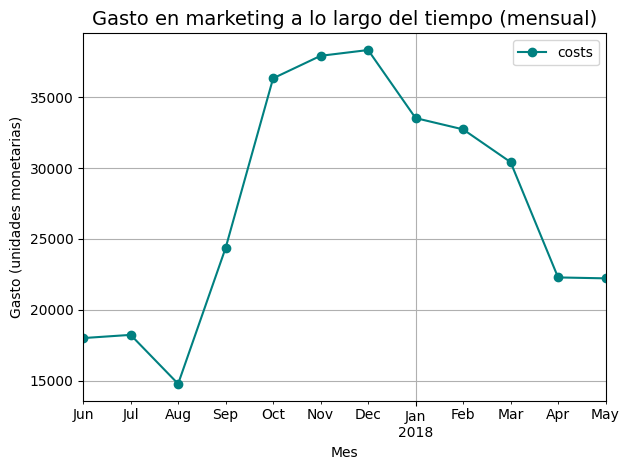

In [67]:
plt.figure(figsize=(12,6))
monthly_costs.plot(kind='line', marker='o', color='teal')
plt.title('Gasto en marketing a lo largo del tiempo (mensual)', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Gasto (unidades monetarias)')
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos observar que la campaña que más costó fue la número 3, con un gasto total de 141,321.63  unidades monetarias, lo que representa la mayor inversión entre todas las fuentes de adquisición. También, a lo largo del tiempo, vemos un aumento progresivo del gasto publicitario entre junio y diciembre de 2017, alcanzando su punto máximo en ese último mes con 38,315.35 unidades monetarias. A partir de enero de 2018, el gasto comenzó a disminuir de forma gradual, manteniéndose en niveles más bajos hasta mayo

#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [68]:
#Paso 1: Contar cuántos clientes únicos llegaron por cada fuente
clients_per_source = visits_complete.groupby('source_id')['uid'].nunique().reset_index()
clients_per_source = clients_per_source.rename(columns={'uid': 'customers_acquired'})
clients_per_source

,source_id,customers_acquired
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974
5,6,6
6,7,34
7,9,9264
8,10,8067


In [69]:
cac = cost_per_ad.reset_index().merge(clients_per_source, on='source_id', how='inner')
cac

,source_id,price_per_ad,customers_acquired
0,1,20833.27,18999
1,2,42806.04,26245
2,3,141321.63,74756
3,4,61073.60,83525
4,5,51757.10,56974
5,9,5517.49,9264
6,10,5822.49,8067


In [70]:
#Calcular el CAC
cac['CAC'] = cac['price_per_ad'] / cac['customers_acquired']
cac

,source_id,price_per_ad,customers_acquired,CAC
0,1,20833.27,18999,1.096546
1,2,42806.04,26245,1.631017
2,3,141321.63,74756,1.890439
3,4,61073.60,83525,0.731201
4,5,51757.10,56974,0.908434
5,9,5517.49,9264,0.595584
6,10,5822.49,8067,0.721766


Parece que las campañas de adquisición están funcionando de forma eficiente. El CAC es bajo en relación con el LTV.

#### ¿Cuán rentables eran las inversiones? (ROMI)

In [71]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   buy_ts                50415 non-null  datetime64[ns]
 1   revenue               50415 non-null  float64       
 2   uid                   50415 non-null  uint64        
 3   order_month           50415 non-null  period[M]     
 4   buy_dt                50415 non-null  object        
 5   first_purchase_month  50415 non-null  period[M]     
 6   age                   50415 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](2), uint64(1)
memory usage: 2.7+ MB


In [72]:
cohort_sizes = orders.groupby('order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['order_month', 'n_buyers']
cohort_sizes.head()

,order_month,n_buyers
0,2017-06,2023
1,2017-07,1984
2,2017-08,1472
3,2017-09,2750
4,2017-10,4675


In [73]:
# Obtener primera visita por usuario
first_visits = visits.sort_values(by='start_ts').drop_duplicates(subset='uid')

# Unir con los usuarios que realizaron compras
first_sources = first_purchase.merge(first_visits[['uid', 'source_id']], on='uid', how='left')
first_sources

,uid,first_purchase_ts,first_purchase_day,first_purchase_month,source_id
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06,10
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10,3
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11,5
...,...,...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-11-24,2017-11,5
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22,2017-09,3
36520,18445601152732270159,2018-03-26 22:54:00,2018-03-26,2018-03,2
36521,18446156210226471712,2018-02-18 19:34:00,2018-02-18,2018-02,3


In [74]:
# Unir pedidos con la fuente de adquisición
orders_with_source = orders.merge(first_sources[['uid', 'source_id']], on='uid', how='left')

# Agrupar por fuente y sumar ingresos
revenue_per_source = orders_with_source.groupby('source_id')['revenue'].sum().reset_index()
revenue_per_source

,source_id,revenue
0,1,31090.55
1,2,46923.61
2,3,54511.24
3,4,56696.83
4,5,52624.02
5,7,1.22
6,9,5759.40
7,10,4450.33


In [75]:
customers_per_source = first_sources.groupby('source_id')['uid'].nunique().reset_index()
customers_per_source.columns = ['source_id', 'customers_acquired']

In [76]:
# Unir con el costo por fuente
romi_df = cost_per_ad.merge(customers_per_source, on='source_id', how='left')
romi_df = romi_df.merge(revenue_per_source, on='source_id', how='left')


romi_df[['customers_acquired', 'revenue']] = romi_df[['customers_acquired', 'revenue']].fillna(0)

#ROMI
romi_df['ROMI'] = (romi_df['revenue'] - romi_df['price_per_ad']) / romi_df['price_per_ad']


romi_df.sort_values(by='ROMI', ascending=False)
romi_df = romi_df.sort_values(by='source_id').reset_index(drop=True)
romi_df

,source_id,price_per_ad,customers_acquired,revenue,ROMI
0,1,20833.27,2899,31090.55,0.492351
1,2,42806.04,3506,46923.61,0.096191
2,3,141321.63,10473,54511.24,-0.614275
3,4,61073.60,10296,56696.83,-0.071664
4,5,51757.10,6931,52624.02,0.016750
5,9,5517.49,1088,5759.40,0.043844
6,10,5822.49,1329,4450.33,-0.235665


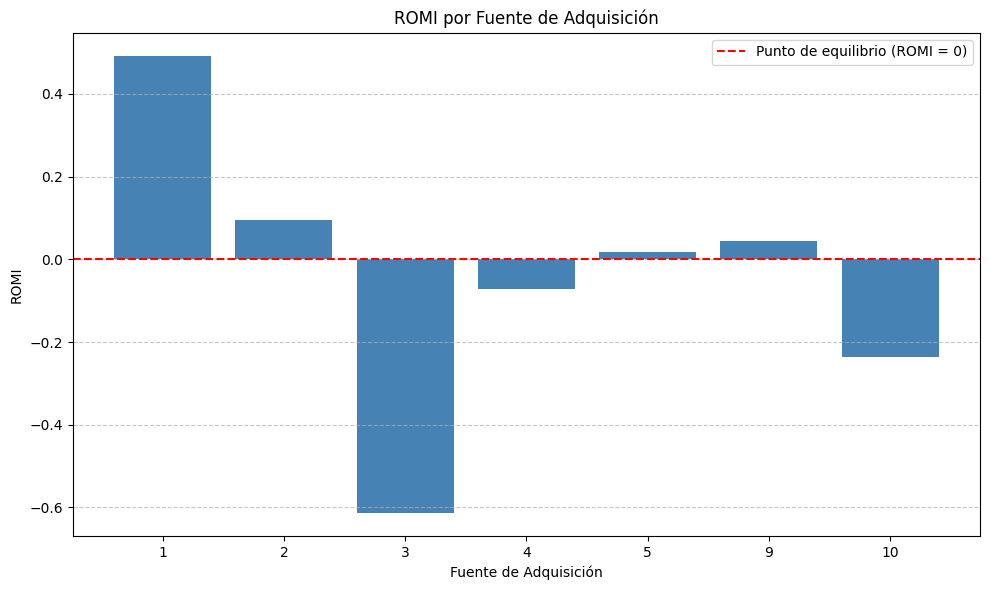

In [77]:
plt.figure(figsize=(10, 6))
plt.bar(romi_df['source_id'].astype(str), romi_df['ROMI'], color='steelblue')
plt.axhline(0, color='red', linestyle='--', label='Punto de equilibrio (ROMI = 0)')
plt.xlabel('Fuente de Adquisición')
plt.ylabel('ROMI')
plt.title('ROMI por Fuente de Adquisición')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

## Paso 3. Aconseja a los expertos de marketing cuánto dinero invertir y dónde

Después de analizar el comportamiento de los usuarios, las conversiones y el retorno de las inversiones en marketing, podemos concluir lo siguiente: La mayoría de los usuarios convierte el mismo día de su primera visita (87%), lo cual indica que la primera impresión y el primer contacto con el sitio son fundamentales. El LTV promedio crece hasta ~11.88 en 12 meses, lo que permite recuperar la inversión si el CAC se mantiene por debajo de ese umbral. Las campañas más rentables fueron la Fuente 1 (ROMI: 0.49) y en menor medida la Fuente 2 (ROMI: 0.096). Ambas generaron ingresos superiores a su costo. Por otro lado, Fuente 3, que fue la campaña más costosa (141K), generó un ROMI de -0.61: fue claramente una inversión ineficiente. Lo mismo ocurre, aunque en menor medida, con las fuentes 4 y 10.

Aumentar inversión en las fuentes 1 y 2, ya que demostraron ser las más rentables. La fuente 1, en particular, logró un retorno cercano al 50% sobre lo invertido. Evaluar el enfoque de la campaña 3, ya que aunque atrajo muchos usuarios, el ingreso generado no justificó el alto gasto. Reducir o reestructurar la inversión en las fuentes 4, 10 y 3, enfocándose en mejorar su conversión inicial o renegociar sus costos. Optimizar el primer contacto, dado que la gran mayoría de conversiones se da en las primeras 24 horas. Invertir en campañas y landing pages específicas para captar atención inmediata podría mejorar el ROMI general. Medir y ajustar constantemente, usando ROMI, LTV y CAC como métricas clave para tomar decisiones informadas sobre inversión.